# Iris Flower Classification Dataset


The Iris flower classification dataset comprises 150 samples of Iris flowers, categorized into three species:
1.Iris setosa
2.Iris versicolor
3.Iris virginica

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
Attribute Information:

1.Sepal length in cm
2.Sepal width in cm
3.Petal length in cm
4.Petal width in cm
5.Class

The dataset is frequently utilized as a standard in the field of machine learning for supervised classification endeavors that aim to precisely categorize Iris flowers by utilizing their measurements as features.

In [1]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#LOADING THE DATASET
df=pd.read_csv("/kaggle/input/iriscsv/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Basic info of datatype in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Display statistics about the data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Display the number of samples on each class
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# Check for the null values
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# Delete the column
df=df.drop(columns="Id")

# Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


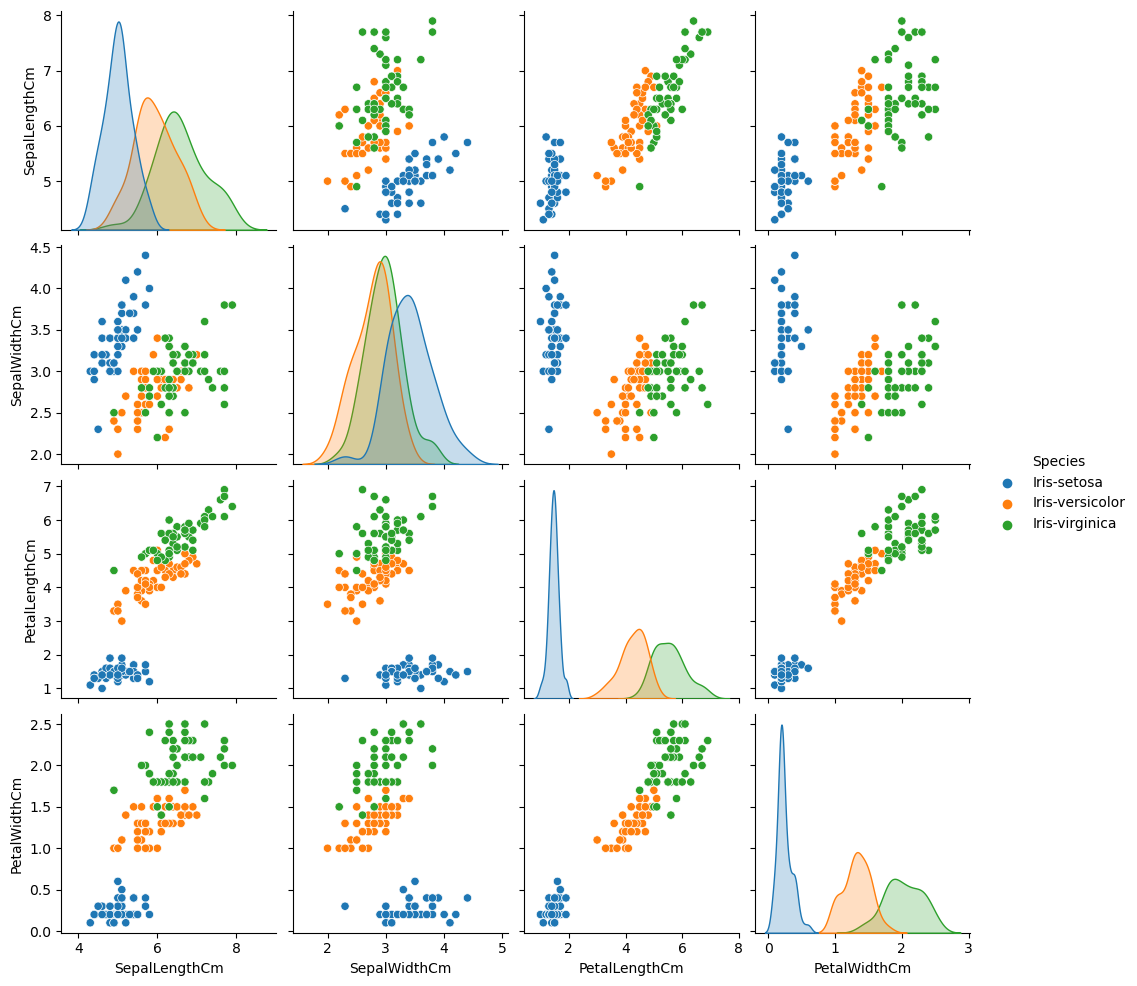

In [12]:
sns.pairplot(data=df,hue='Species')

# Correlation Matrix

Correlation matrix shows relationships between variables, helping identify patterns and dependencies in data through correlation coefficients.

In [13]:
# Compute the correlation matrix
df.corr()

/tmp/ipykernel_32/1157198854.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


/tmp/ipykernel_32/3280799729.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

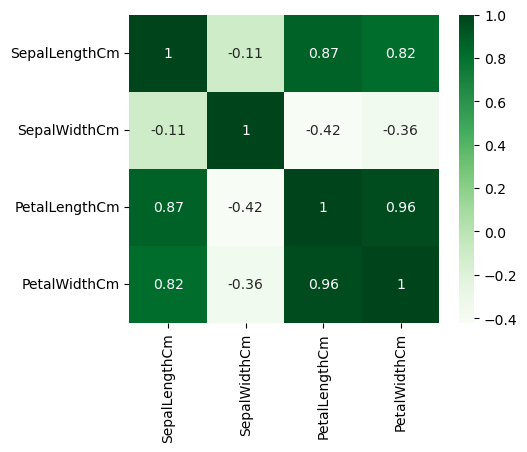

In [17]:
# Display the correlation matrix using a heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='Greens')


# Model Training

In [51]:
#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [57]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
logreg_accuracy= model.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ",logreg_accuracy )

Accuracy (Logistic Regression):  97.77777777777777


In [58]:
# K-nearest Neighbours Model (KNN)
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()
model1.fit(x_train,y_train)
knn_accuracy=model1.score(x_test, y_test) * 100
print("Accuracy (KNN): ",knn_accuracy)

Accuracy (KNN):  97.77777777777777


In [61]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
decision_tree_accuracy = model2.score(x_test, y_test) * 100
print("Accuracy (Decision Tree): ",decision_tree_accuracy)

Accuracy (Decision Tree):  95.55555555555556


# Project Report

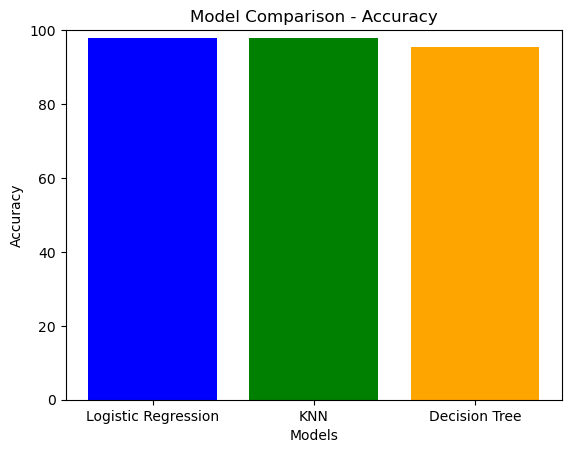

In [62]:
# Model Comparison - Visualization
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [logreg_accuracy,knn_accuracy,decision_tree_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()

# Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
y_pred1 = model.predict(x_test)
y_pred2 = model1.predict(x_test)
y_pred3 = model2.predict(x_test)


conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)


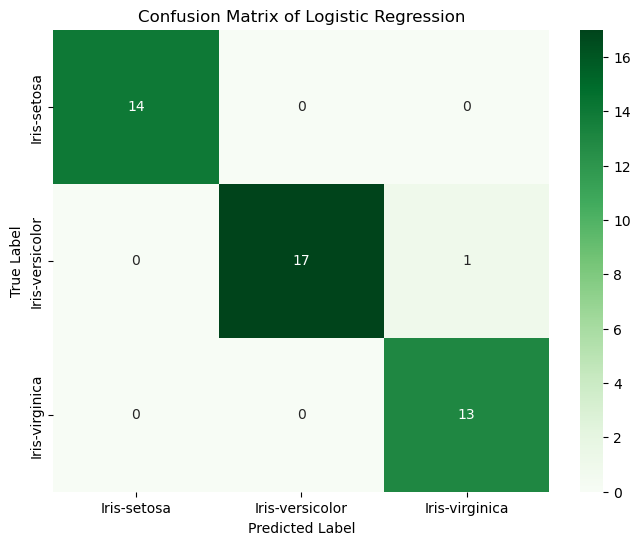

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

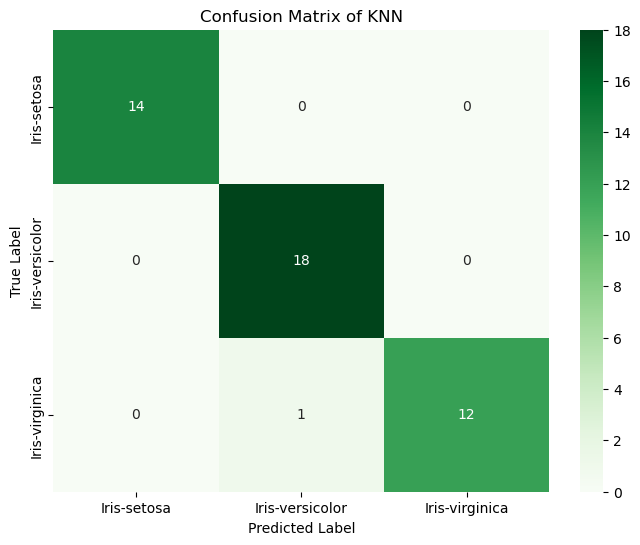

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

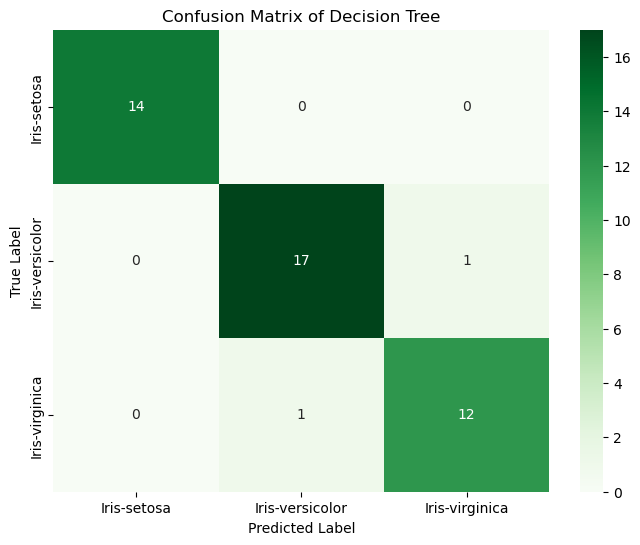

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')
plt.show()